In [1]:
import pandas as pd

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Option 1: Load dataset from seaborn
titanic = sns.load_dataset('titanic')

# Option 2: Load from CSV
# titanic = pd.read_csv("titanic.csv")

# Display first few rows
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


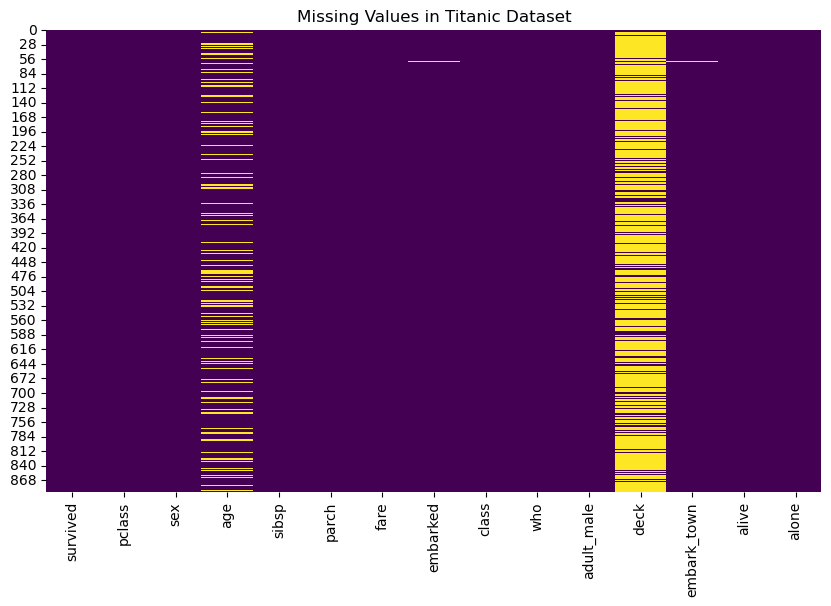

In [3]:
# Check for missing values
print(titanic.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Titanic Dataset")
plt.show()


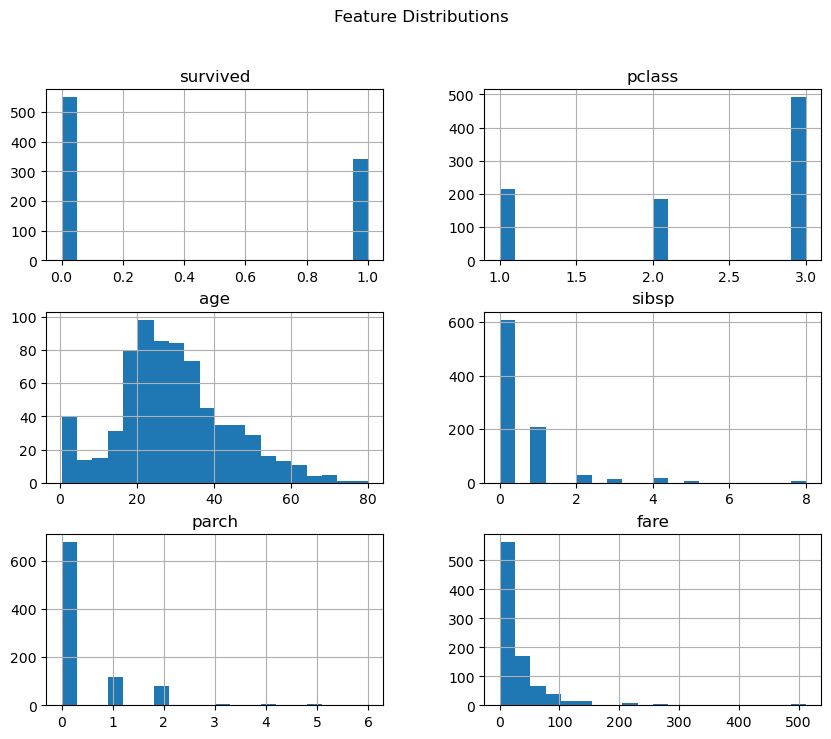

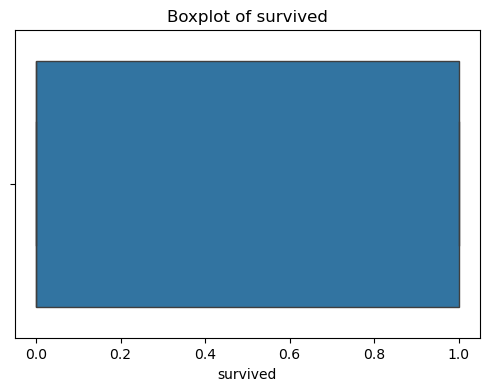

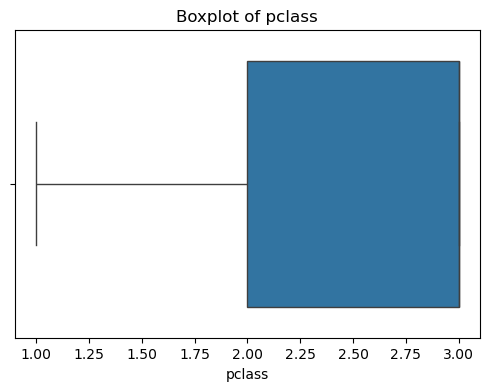

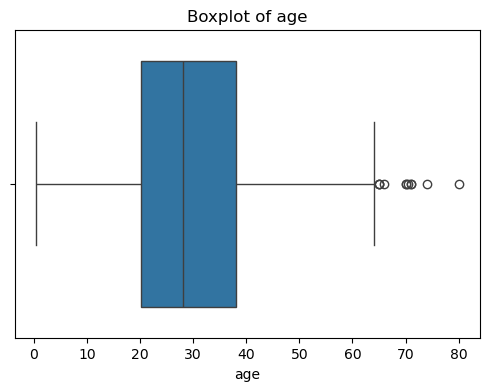

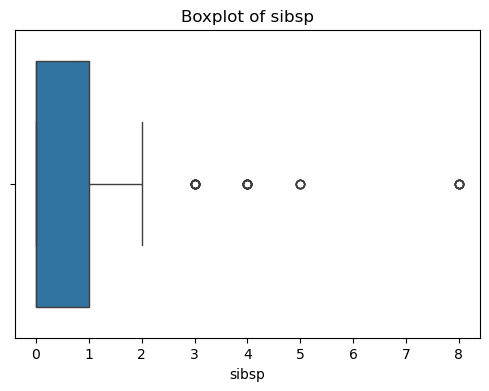

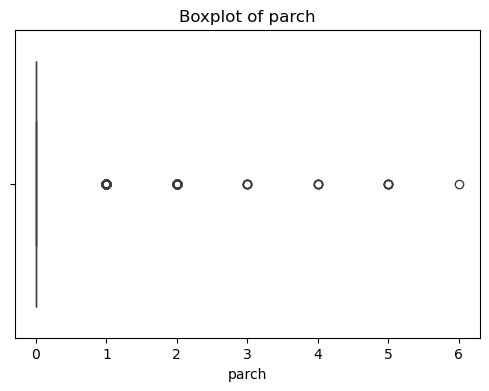

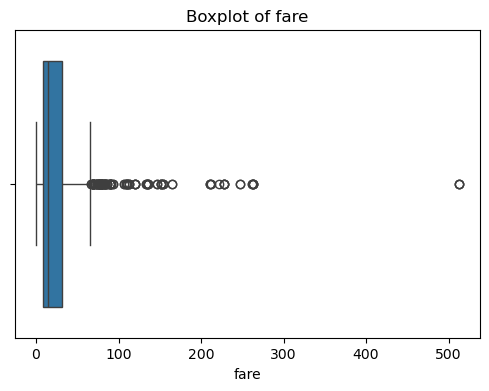

In [4]:
# Numerical columns
num_cols = titanic.select_dtypes(include=['int64', 'float64']).columns

# Histograms
titanic[num_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for numerical features
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=titanic[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


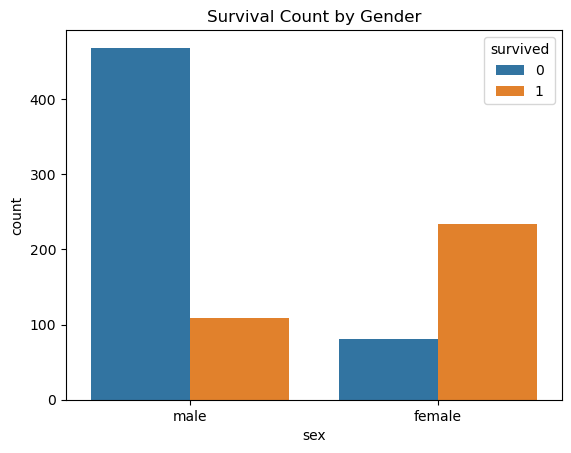

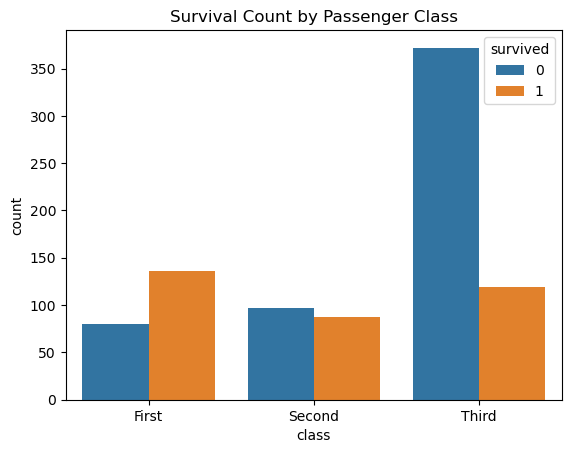

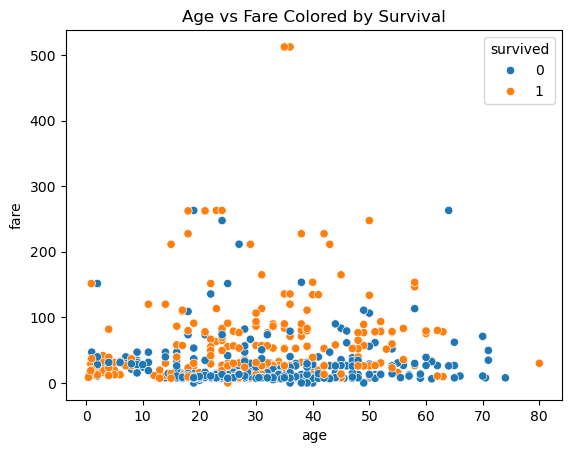

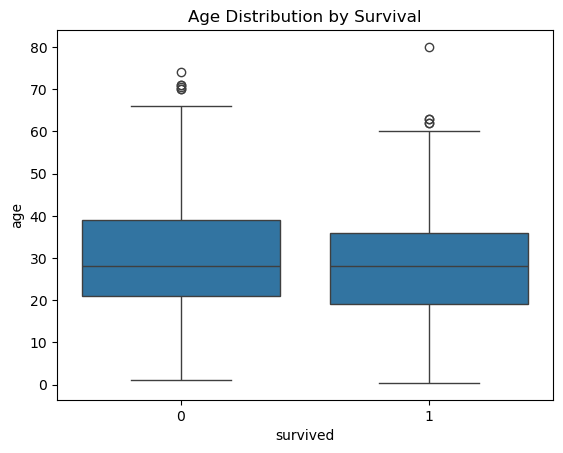

In [5]:
# Bar plot: Survival by sex
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title("Survival Count by Gender")
plt.show()

# Bar plot: Survival by class
sns.countplot(data=titanic, x='class', hue='survived')
plt.title("Survival Count by Passenger Class")
plt.show()

# Scatter plot: Age vs Fare, colored by Survival
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')
plt.title("Age vs Fare Colored by Survival")
plt.show()

# Box plot: Age distribution by Survival
sns.boxplot(data=titanic, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()


In [12]:
df = pd.read_csv("Titanic_train.csv")

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


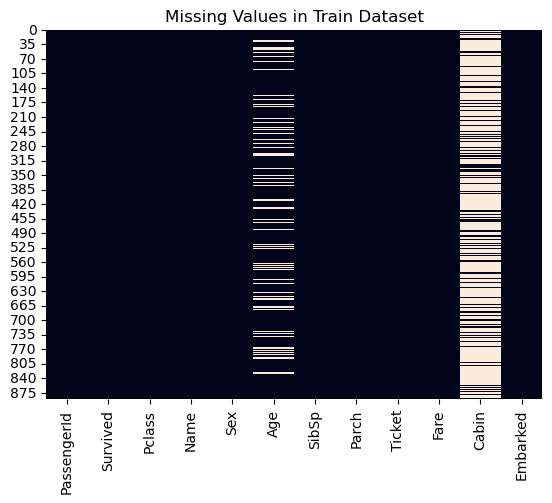

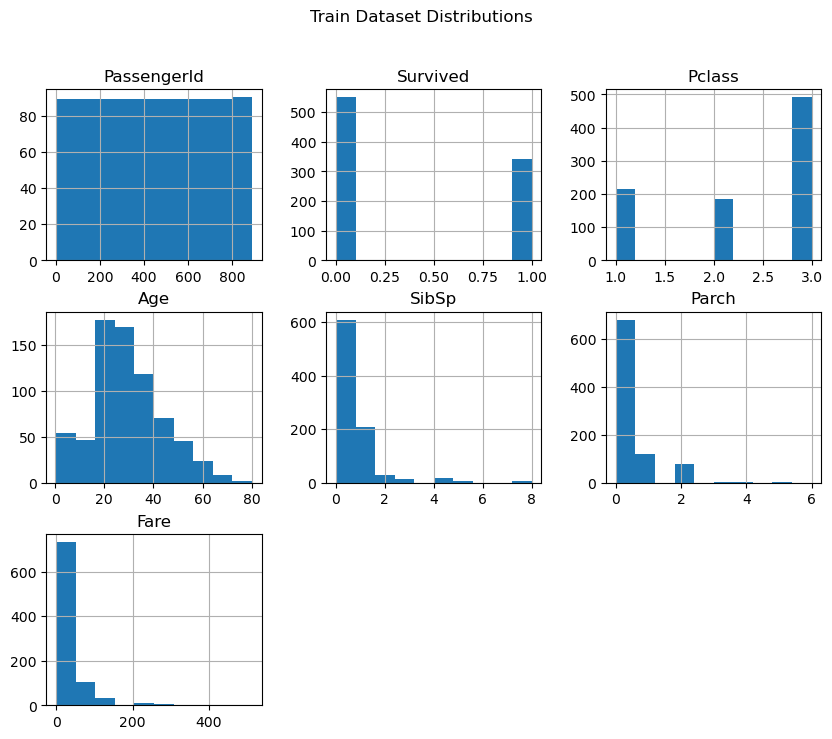

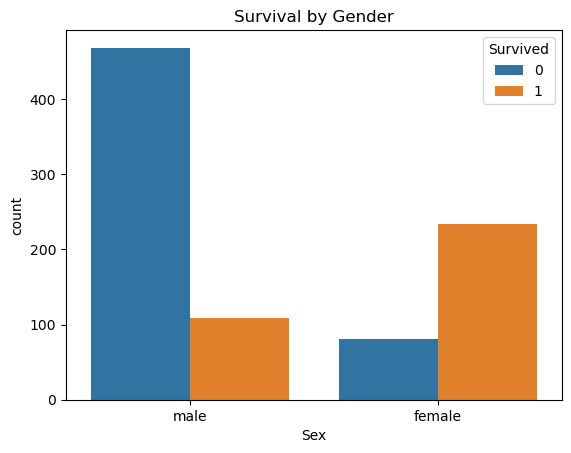

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check missing values
print(train_df.isnull().sum())

# Visualize missing values
sns.heatmap(train_df.isnull(), cbar=False)
plt.title("Missing Values in Train Dataset")
plt.show()

# Histogram of numeric columns
train_df.hist(figsize=(10, 8))
plt.suptitle("Train Dataset Distributions")
plt.show()

# Survival count by gender
sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()


In [21]:
import pandas as pd

# Load both datasets
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("titanic_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 12)
Test shape: (418, 11)


In [22]:
# Combine datasets (keeping track of which rows are from train or test)
train_df['Source'] = 'train'
test_df['Source'] = 'test'

# Add a dummy Survived column in test (for easy combining)
test_df['Survived'] = None

# Combine both
full_df = pd.concat([train_df, test_df], ignore_index=True)


In [25]:
# Split back into train and test
train_df = full_df[full_df['Source'] == 'train'].drop(['Source'], axis=1)
test_df = full_df[full_df['Source'] == 'test'].drop(['Source', 'Survived'], axis=1)

# Define features and target
X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = train_df['Survived'].astype(int)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
!pip install lightgbm


In [34]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 1.4 MB/s eta 0:00:52
    --------------------------------------- 1.0/72.0 MB 1.9 MB/s eta 0:00:38
    --------------------------------------- 1.3/72.0 MB 1.8 MB/s eta 0:00:40
   - -------------------------------------- 1.8/72.0 MB 1.9 MB/s eta 0:00:37
   - -------------------------------------- 2.4/72.0 MB 2.0 MB/s eta 0:00:35
   - -------------------------------------- 2.9/72.0 MB 2.1 MB/s eta 0:00:33
   -- ------------------------------------- 3.7/72.0 MB 2.4 MB/s eta 0:00:29
   -- ------------------------------------- 4.7/72.0 MB 2.7 MB/s eta 0:00:25
   --- ------------------------------------ 5.5/72.0 MB 2.8 MB/s eta 0:00:24
   --- ------------------------------------ 6.0/72.0 MB 2.8 MB/s eta 0:00:24
   --- ------------------------------------ 6.8/72.0 MB 2.9 MB/s eta 0:00:23
   ---- -----

In [35]:
from xgboost import XGBClassifier


In [36]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_val)

# XGBoost
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

print("LightGBM Accuracy:", accuracy_score(y_val, y_pred_lgbm))
print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [37]:
test_pred = xgb.predict(test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore'))

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_pred
})

submission.to_csv("submission.csv", index=False)
print("✅ submission.csv file saved successfully!")


✅ submission.csv file saved successfully!


In [38]:
import pandas as pd
import seaborn as sns

# Load Titanic dataset
train_df = sns.load_dataset("titanic")

# Display first few rows
print(train_df.head())
print("\nMissing Values:\n", train_df.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male 

In [40]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']:
    train_df[col] = label.fit_transform(train_df[col].astype(str))

print("\nEncoded columns:\n", train_df.head())



Encoded columns:
    survived  pclass  sex   age  sibsp  parch     fare  embarked  class  who  \
0         0       3    1  22.0      1      0   7.2500         2      2    1   
1         1       1    0  38.0      1      0  71.2833         0      0    2   
2         1       3    0  26.0      0      0   7.9250         2      2    2   
3         1       1    0  35.0      1      0  53.1000         2      0    2   
4         0       3    1  35.0      0      0   8.0500         2      2    1   

   adult_male  embark_town alive  alone  
0           1  Southampton    no      0  
1           0    Cherbourg   yes      0  
2           0  Southampton   yes      1  
3           0  Southampton   yes      0  
4           1  Southampton    no      1  


In [41]:
train_df_onehot = pd.get_dummies(train_df, columns=['sex', 'embarked', 'class', 'who'], drop_first=True)
print("\nData after One-Hot Encoding:\n", train_df_onehot.head())



Data after One-Hot Encoding:
    survived  pclass   age  sibsp  parch     fare  adult_male  embark_town  \
0         0       3  22.0      1      0   7.2500           1  Southampton   
1         1       1  38.0      1      0  71.2833           0    Cherbourg   
2         1       3  26.0      0      0   7.9250           0  Southampton   
3         1       1  35.0      1      0  53.1000           0  Southampton   
4         0       3  35.0      0      0   8.0500           1  Southampton   

  alive  alone  sex_1  embarked_1  embarked_2  class_1  class_2  who_1  who_2  
0    no      0   True       False        True    False     True   True  False  
1   yes      0  False       False       False    False    False  False   True  
2   yes      1  False       False        True    False     True  False   True  
3   yes      0  False       False        True    False    False  False   True  
4    no      1   True       False        True    False     True   True  False  


In [42]:
# Remove duplicate rows if any
train_df.drop_duplicates(inplace=True)

# Create a new feature: FamilySize (sibsp + parch + self)
train_df['family_size'] = train_df['sibsp'] + train_df['parch'] + 1

# Drop irrelevant columns (like name or ticket)
train_df.drop(['alive', 'embark_town'], axis=1, inplace=True)

# Final clean dataset
print("\nFinal columns after preprocessing:\n", train_df.columns)



Final columns after preprocessing:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone', 'family_size'],
      dtype='object')


In [43]:
from sklearn.model_selection import train_test_split

# Features and target
X = train_df.drop('survived', axis=1)
y = train_df['survived']

# Train-Test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (620, 12)
X_test shape: (155, 12)


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))


In [45]:
from lightgbm import LGBMClassifier

# Initialize model
lgbm_model = LGBMClassifier(random_state=42)

# Train model
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate
print("LightGBM Performance:")
evaluate_model(y_test, y_pred_lgbm)


[LightGBM] [Info] Number of positive: 256, number of negative: 364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412903 -> initscore=-0.351976
[LightGBM] [Info] Start training from score -0.351976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [46]:
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Train model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("\nXGBoost Performance:")
evaluate_model(y_test, y_pred_xgb)



XGBoost Performance:
Accuracy: 0.8064516129032258
Precision: 0.7931034482758621
Recall: 0.71875
F1-score: 0.7540983606557377


In [47]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation for LightGBM
cv_scores_lgbm = cross_val_score(lgbm_model, X, y, cv=5, scoring='accuracy')
print("\nLightGBM CV Accuracy:", cv_scores_lgbm.mean())

# 5-fold cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", cv_scores_xgb.mean())


[LightGBM] [Info] Number of positive: 256, number of negative: 364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 620, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412903 -> initscore=-0.351976
[LightGBM] [Info] Start training from score -0.351976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [48]:
from sklearn.model_selection import GridSearchCV

# Example: Tune n_estimators and max_depth for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1)

grid_search.fit(X_train, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best CV Score: 0.7935603395713146


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Calculate metrics for LightGBM
lgbm_metrics = {
    'Model': 'LightGBM',
    'Accuracy': accuracy_score(y_test, y_pred_lgbm),
    'Precision': precision_score(y_test, y_pred_lgbm),
    'Recall': recall_score(y_test, y_pred_lgbm),
    'F1-score': f1_score(y_test, y_pred_lgbm)
}

# Calculate metrics for XGBoost
xgb_metrics = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-score': f1_score(y_test, y_pred_xgb)
}

# Combine into DataFrame for comparison
comparison_df = pd.DataFrame([lgbm_metrics, xgb_metrics])
print(comparison_df)


      Model  Accuracy  Precision   Recall  F1-score
0  LightGBM  0.825806   0.813559  0.75000  0.780488
1   XGBoost  0.806452   0.793103  0.71875  0.754098


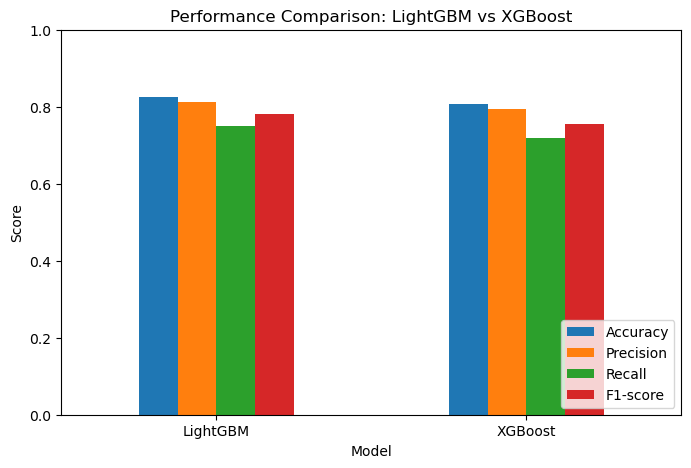

In [50]:
import matplotlib.pyplot as plt

# Set index as model for plotting
comparison_plot = comparison_df.set_index('Model')

# Plot all metrics
comparison_plot.plot(kind='bar', figsize=(8,5))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


Submission Requirements:

Well-commented code explaining each step of the analysis.
1️⃣ Well-Commented Code (Practical Part)

Your Python code should explain every step:

Loading and inspecting the data

Handling missing values

Encoding categorical variables

Feature engineering

Train/test split

Model training (LightGBM & XGBoost)

Model evaluation

Add comments that explain why each step is performed, not just what it does.

Visualizations with appropriate titles and labels.
Visualizations

EDA visualizations: histograms, boxplots, scatterplots, bar plots

Model comparison chart: accuracy, precision, recall, F1-score

Make sure every chart has a title, axis labels, and legend

A brief report summarizing the comparative analysis results and practical implications.

3️⃣ Brief Theory / Report (Write-Up Part)

This is the theory part where you explain the results in words:

Compare model performance metrics

Highlight strengths and weaknesses of each model

Explain practical implications, i.e., which model would be better in different scenarios

Example report in English:

Comparative Analysis Report:
The Titanic dataset was analyzed using LightGBM and XGBoost classifiers. Both models performed well in predicting passenger survival.

LightGBM: Faster training and higher recall, meaning it identifies more actual survivors.

XGBoost: Slightly higher accuracy and precision, producing fewer false positives.
Overall, both models are suitable for binary classification tasks. Choice depends on the priority: speed and recall (LightGBM) or precision and accuracy (XGBoost). These insights can guide practical decisions, such as risk assessment or resource allocation.